In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')

# path to data folder
PATH = r'C:\Users\Никита\Андан\Project\data'

# Content

# Macro data

## Financial assets and obligations of households

All data is given at the reporting data in billions of rubles. Monthly data

In [5]:
df = pd.read_csv(os.path.join(PATH, r'macro\households_bm_processed.csv'))
df['date'] = pd.to_datetime(df['date'])

In [8]:
# cr
df.columns

Index(['date', 'Наличная национальная валюта', 'Наличная иностранная валюта',
       'Депозиты', 'Денежные средства на брокерских счетах',
       'Долговые ценные бумаги',
       'Котируемые акции и паи и акции инвестиционных фондов',
       'Кредиты кредитных организаций'],
      dtype='object')

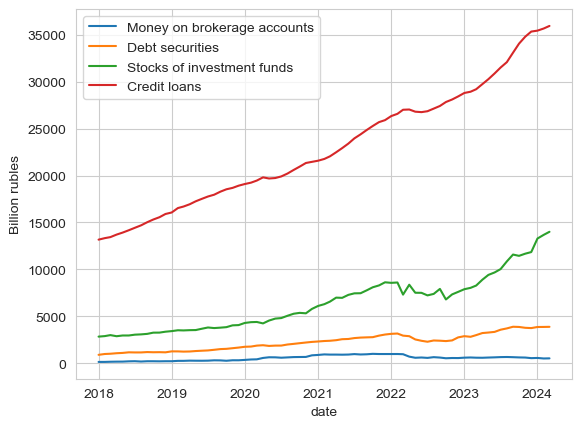

In [14]:
# investment activity VS credit loans

sns.lineplot(df, x = 'date', y = 'Денежные средства на брокерских счетах', label = 'Money on brokerage accounts')
sns.lineplot(df, x = 'date', y = 'Долговые ценные бумаги', label = 'Debt securities' )
sns.lineplot(df, x = 'date', y = 'Котируемые акции и паи и акции инвестиционных фондов', label = 'Stocks of investment funds')
sns.lineplot(df, x = 'date', y = 'Кредиты кредитных организаций', label = 'Credit loans')
plt.ylabel('Billion rubles')
plt.legend();

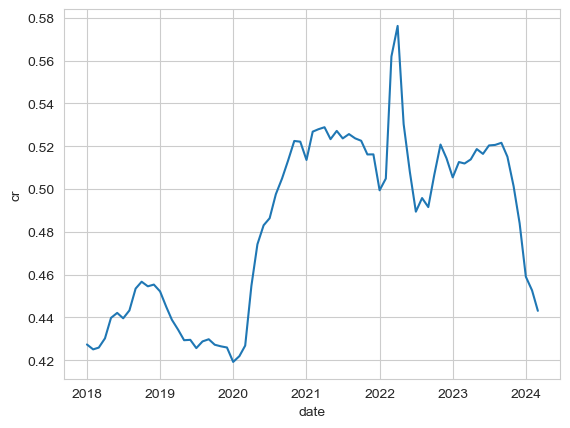

In [17]:
# cr

df['cr'] = (df['Наличная национальная валюта'] + df['Наличная иностранная валюта']) / df['Депозиты']

sns.lineplot(df, x = 'date', y = 'cr');

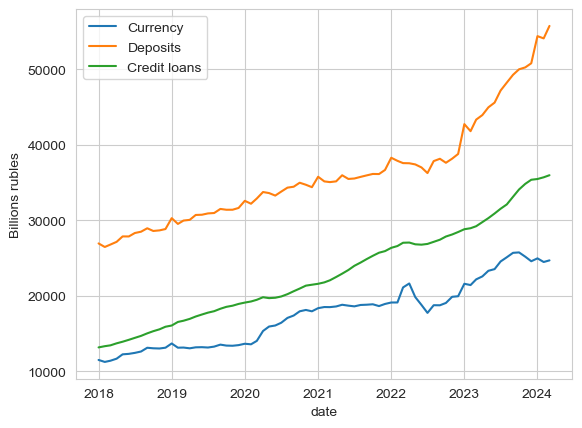

In [19]:
df['currency'] = df['Наличная национальная валюта'] + df['Наличная иностранная валюта']

sns.lineplot(df, x = 'date', y = 'currency', label = 'Currency')
sns.lineplot(df, x = 'date', y = 'Депозиты', label = 'Deposits')
sns.lineplot(df, x = 'date', y = 'Кредиты кредитных организаций', label = 'Credit loans')
plt.ylabel('Billions rubles')
plt.legend();

## Debt of nonfinancial sector and households

In millions of rubles. Quarterly data

Domestic borrowings of non-financial corporations include debt on loans provided by credit institutions and debt securities issued on the domestic market. Debt on debt securities is accounted for at face value less debt securities repurchased by issuers.

Domestic household borrowing includes bank loan debt.

External borrowings of non-financial corporations include debt securities in the portfolio of non-residents (including debt on promissory notes), as well as debt on loans and borrowings to non-residents, excluding debt on repo transactions.

The external borrowings of households consist of debt on loans and borrowings and debt securities to non-residents. [Source and extended analysis](https://www.cbr.ru/statistics/macro_itm/dkfs/ext_dep_indicator/#:~:text=%D0%9C%D0%B0%D0%BA%D1%80%D0%BE%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0-,%D0%A0%D0%B0%D1%81%D1%88%D0%B8%D1%80%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%B4%D0%BE%D0%BB%D0%B3%D0%B0%20%D0%BD%D0%B5%D1%84%D0%B8%D0%BD%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE%20%D1%81%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B0%20%D0%B8%20%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B8%D1%85%20%D1%85%D0%BE%D0%B7%D1%8F%D0%B9%D1%81%D1%82%D0%B2,%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%B8%D0%BB%20119%2C6%20%D1%82%D1%80%D0%BB%D0%BD%20%D1%80%D1%83%D0%B1%D0%BB%D0%B5%D0%B9.)

In [28]:
df_debt = pd.read_csv(os.path.join(PATH, r'macro\nonfinancial_sector_households_debt_extended_processed.csv'))
df_debt['date'] = pd.to_datetime(df_debt['date'])

new_cols = [col.strip() for col in df_debt.columns]
df_debt = df_debt.set_axis(new_cols, axis = 1)

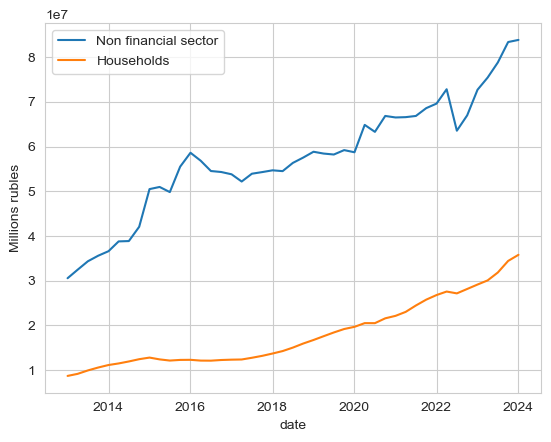

In [30]:
# debt of financial sector and households

sns.lineplot(df_debt, x = 'date', y = 'Нефинансовый сектор', label = 'Non financial sector')
sns.lineplot(df_debt, x = 'date', y = 'Домашние хозяйства и НКООДХ', label = 'Households')
plt.ylabel('Millions rubles')
plt.legend();

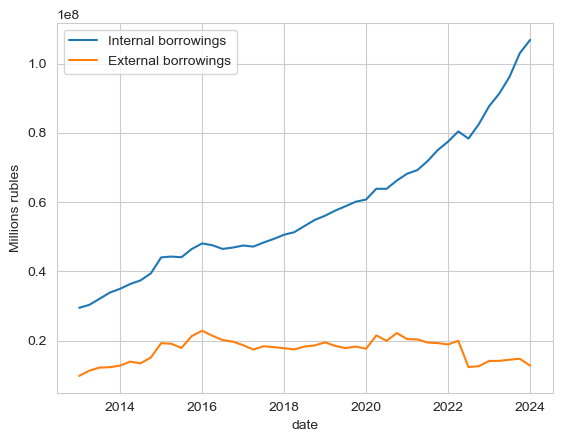

In [33]:
# internal borrowings and external borrowings

df_debt['internal'] = df_debt['Внутренние заимствования'] + df_debt['Внутренние заимствования.1']
df_debt['external'] = df_debt['Внешние заимствования'] + df_debt['Внешние заимствования.1']

sns.lineplot(df_debt, x = 'date', y = 'internal', label = 'Internal borrowings')
sns.lineplot(df_debt, x = 'date', y = 'external', label = 'External borrowings')
plt.ylabel('Millions rubles')
plt.legend();

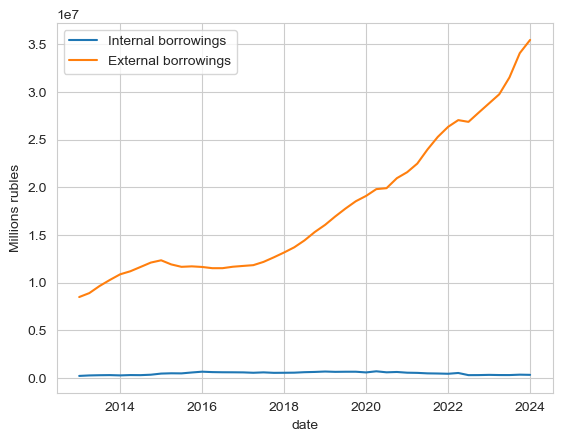

In [36]:
sns.lineplot(df_debt, x = 'date', y = 'Внешние заимствования.1', label = 'Internal borrowings')
sns.lineplot(df_debt, x = 'date', y = 'Внутренние заимствования.1', label = 'External borrowings')
plt.ylabel('Millions rubles')
plt.legend();

## Monetary supply

Billions of rubles. Monthly data

In [41]:
df_monetary = pd.read_csv(os.path.join(PATH, r'macro\monetary_agg_processed.csv'))
df_monetary['date'] = pd.to_datetime(df_monetary['date'])

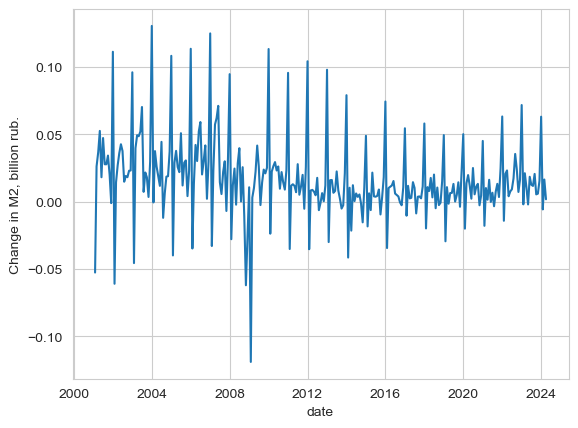

In [49]:
df_monetary['change in M2'] = df_monetary['Денежный агрегат М2'].pct_change()

sns.lineplot(df_monetary, x = 'date', y = 'change in M2')
plt.ylabel('Change in M2, billion rub.');

# Relationship of macro data and daily stock markets

## Testing relations

The first scope in this section is to determine whether macro data is correlated and useful for prediction stock prices. For this purpose Granger casuality test was used. All test are held on fintech stocks assuming that for other stocks relation also exists.  

Let $x_t,y_t$ be time series. For lag $l$ suppose one of linear relations:
$$
x_t = a_0 + a_1 x_{t-1} + \ldots + a_l x_{t-l} + b_0 + b_1 y_{t-1} + \ldots + b_l y_{t-l}
$$
$$
y_t = c_0 + c_1 x_{t-1} + \ldots + c_l x_{t-l} + d_0 + d_1 y_{t-1} + \ldots + d_l x_{t-l}
$$

it tests two hypotheses consequently:
$$
H_0 : b_1 = b_2 = \ldots = b_l = 0
$$
$$
H_1 : c_1 = c_2 = \ldots = c_l = 0
$$

**Results**

We find *strong relation between some time series (stocks and macro data) for different lags*. It is not known whether macro data influence on stock prices or on the contrary, but potentially daily macro data can be useful for stock prices.      

In [55]:
# fintech

fintech = pd.read_csv(os.path.join(PATH, r'final_datasets\final_fintech.csv'))
fintech['date'] = pd.to_datetime(fintech['date'])

ticker_names = [ticker_name[:-4] for ticker_name in os.listdir(os.path.join(PATH, 'fintech'))]
ticker_names_ru = [ticker_name for ticker_name in ticker_names if ticker_name[-2:] == 'RU']

In [57]:
# aggregating to macro data

fintech = fintech.sort_values('date')
fintech.set_index('date', inplace = True)

# fintech_monthly = fintech.resample('M').last()
# fintech_monthly.reset_index(inplace = True)

In [65]:
macro_vars = ['Debt of the non-financial sector and households, total',
       'Non-financial sector, total',
       'Internal borrowings, non-financial sector', 'Credits',
       'Debt securities in the residents portfolio',
       'External borrowings, non-financial sector',
       'Loans and borrowings received from non-residents',
       'Debt securities in the portfolio of non-residents, including promissory notes',
       'Households and NPOs, total', 'Internal borrowings, households',
       'External borrowings, households', 'real_gdp_usa', 'm0_ru',
       'm1_ru', 'm2_ru', 'broad_money_supply_ru',
       'Cash national currency', 'Foreign currency in cash', 'Deposits',
       'Cash on brokerage accounts', 'Debt securities',
       'Quoted shares and units and shares of investment funds',
       'Loans from credit institutions']

ticker_cols = [col for col in fintech.columns if 'close' in col and col[6:] in ticker_names_ru]
# fintech_monthly = fintech_monthly[ticker_cols + macro_vars]

In [90]:
from statsmodels.tsa.stattools import grangercausalitytests
from IPython.display import clear_output

def check_granger_casuality(df, first_cols, second_cols):
    '''
    Checks casuality with Granger test for all columns in first_cols
    against all columns in second_cols
    
    df: pd.DataFrame to check casuality
    first_cols: str[]
    second_cols: str[]

    returns
    dict{lag: first_col:{second_col: p_value for ssr F test}, ...}
    '''
    lags = 12
    results = {}

    for lag in range(1, lags + 1): 
        lag_dict = {}  
        for first_col in first_cols:
            first_col_dict = {}
            for second_col in second_cols:
                result = grangercausalitytests(df[[first_col, second_col]], maxlag=[lag])
                clear_output(wait=True)
                p_value = result[lag][0]['ssr_ftest'][1]
                first_col_dict[second_col] = p_value 
            lag_dict[first_col] = first_col_dict  
        results[lag] = lag_dict  
    return results

results = check_granger_casuality(fintech, ticker_cols, macro_vars)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8011  , p=0.0162  , df_denom=1300, df_num=1
ssr based chi2 test:   chi2=5.8145  , p=0.0159  , df=1
likelihood ratio test: chi2=5.8015  , p=0.0160  , df=1
parameter F test:         F=5.8011  , p=0.0162  , df_denom=1300, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8611  , p=0.0576  , df_denom=1297, df_num=2
ssr based chi2 test:   chi2=5.7443  , p=0.0566  , df=2
likelihood ratio test: chi2=5.7317  , p=0.0569  , df=2
parameter F test:         F=2.8611  , p=0.0576  , df_denom=1297, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9341  , p=0.1222  , df_denom=1294, df_num=3
ssr based chi2 test:   chi2=5.8338  , p=0.1200  , df=3
likelihood ratio test: chi2=5.8208  , p=0.1207  , df=3
parameter F test:         F=1.9341  , p=0.1222  , df_denom=1294, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5684  , p=0.

In [96]:
pd.DataFrame(results[1])

,close_ARSA_RU,close_AVAN_RU,close_BSPB_RU,close_CBOM_RU,close_KUZB_RU,close_LSRG_RU,close_MOEX_RU,close_PRMB_RU,close_QIWI_RU,close_RGSS_RU,close_ROSB_RU,close_SBER_RU,close_SFIN_RU,close_USBN_RU,close_VTBR_RU,close_WTCM_RU
"Debt of the non-financial sector and households, total",5.524484e-05,0.152500,0.039007,0.120449,0.021093,0.386157,0.107051,0.120303,0.020628,0.032841,0.000493,0.381399,0.008567,0.088012,0.276124,0.003192
"Non-financial sector, total",9.548586e-05,0.147952,0.066632,0.141612,0.024692,0.261559,0.064690,0.129931,0.036630,0.021072,0.001495,0.269263,0.006891,0.088214,0.440873,0.001397
"Internal borrowings, non-financial sector",8.541411e-05,0.210113,0.003492,0.069728,0.003372,0.332956,0.052492,0.233814,0.076512,0.027998,0.000584,0.297137,0.007772,0.028866,0.331884,0.001661
Credits,9.306279e-05,0.252646,0.002463,0.071699,0.002470,0.286333,0.039927,0.297918,0.100318,0.023567,0.000799,0.262496,0.006236,0.021877,0.370963,0.001343
Debt securities in the residents portfolio,1.086841e-02,0.024082,0.083004,0.130174,0.088175,0.993412,0.544670,0.003544,0.004383,0.246125,0.000637,0.814709,0.084816,0.255100,0.162198,0.045220
"External borrowings, non-financial sector",1.806077e-01,0.719385,0.078554,0.117594,0.067789,0.853366,0.109584,0.954190,0.943275,0.293858,0.048255,0.602096,0.215156,0.105087,0.357702,0.106584
Loans and borrowings received from non-residents,1.826284e-01,0.707527,0.079851,0.117670,0.068138,0.868349,0.113750,0.945790,0.953804,0.295635,0.047092,0.613411,0.223981,0.108734,0.343595,0.109067
"Debt securities in the portfolio of non-residents, including promissory notes",2.813508e-01,0.266590,0.266771,0.418079,0.348979,0.109089,0.018065,0.393753,0.345578,0.404077,0.642688,0.118687,0.008510,0.053844,0.226168,0.094754
"Households and NPOs, total",3.357343e-04,0.182864,0.037106,0.116309,0.032677,0.639477,0.210961,0.129386,0.009518,0.072997,0.000164,0.599452,0.016372,0.116208,0.122350,0.014073
"Internal borrowings, households",3.978116e-04,0.178424,0.036158,0.112812,0.032267,0.651924,0.213021,0.128198,0.009781,0.074169,0.000165,0.603434,0.017933,0.117375,0.120127,0.014821


In [109]:
def normalize_ts(ts):
    '''
    Min-max normalization for time series in 1d-array
    '''
    ts = (ts - ts.min()) / (ts.max() - ts.min())
    return ts

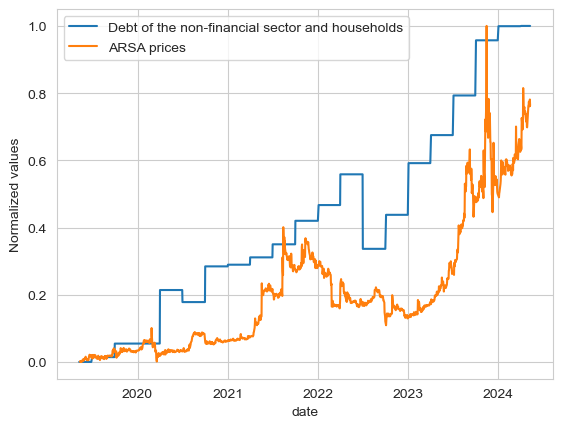

In [108]:
# for instance, visualize some random relation
ts_1 = normalize_ts(fintech['Debt of the non-financial sector and households, total'])
ts_2 = normalize_ts(fintech['close_ARSA_RU'].shift(1))

sns.lineplot(x = fintech.index, y = ts_1, label = 'Debt of the non-financial sector and households')
sns.lineplot(x = fintech.index, y = ts_2, label = 'ARSA prices')
plt.ylabel('Normalized values')
plt.legend();

## New macro variables

We add new macro variables that also can influence on daily prices.

- `cr` - cash ratio = Cash / Deposits. 
- `Internal/External debt`
- `credits/deposits`
- `market_money/monetary_supply`. Market money includes debt securities, cash on brokerage accounts and shares of investment funds held by households.
- `m0_pct_change` - percentage change (in fraction) of M0 monetay aggregate supply.

For all variables except of credit/deposit ratio and M0 percentage change statistically sugnificant relation was found. Hence, they will be included in final dataset for training.

In [126]:
# new macro variables
new_macro_vars = ['cr', 'Internal/External debt', 
                  'credits/deposits', 'market_money/monetary_supply', 'm0_pct_change']


fintech['cr'] = fintech['Cash national currency'] / fintech['Deposits']
fintech['Internal/External debt'] = (fintech['Internal borrowings, non-financial sector'] + fintech['Internal borrowings, households']) / \
                                    (fintech['External borrowings, non-financial sector'] + fintech['External borrowings, households'])
fintech['credits/deposits'] = fintech['Credits'] / fintech['Deposits']
fintech['market_money/monetary_supply'] = (fintech['Debt securities'] + fintech['Cash on brokerage accounts'] + \
                                           fintech['Quoted shares and units and shares of investment funds']) / fintech['broad_money_supply_ru']
fintech['m0_pct_change'] = fintech['m0_ru'].pct_change().bfill()

In [127]:
results = check_granger_casuality(fintech, ticker_cols, new_macro_vars)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4747  , p=0.4909  , df_denom=1300, df_num=1
ssr based chi2 test:   chi2=0.4758  , p=0.4903  , df=1
likelihood ratio test: chi2=0.4758  , p=0.4904  , df=1
parameter F test:         F=0.4747  , p=0.4909  , df_denom=1300, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5904  , p=0.5543  , df_denom=1297, df_num=2
ssr based chi2 test:   chi2=1.1853  , p=0.5529  , df=2
likelihood ratio test: chi2=1.1848  , p=0.5530  , df=2
parameter F test:         F=0.5904  , p=0.5543  , df_denom=1297, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7938  , p=0.4973  , df_denom=1294, df_num=3
ssr based chi2 test:   chi2=2.3943  , p=0.4947  , df=3
likelihood ratio test: chi2=2.3921  , p=0.4951  , df=3
parameter F test:         F=0.7938  , p=0.4973  , df_denom=1294, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7598  , p=0.

In [128]:
pd.DataFrame(results[1])

,close_ARSA_RU,close_AVAN_RU,close_BSPB_RU,close_CBOM_RU,close_KUZB_RU,close_LSRG_RU,close_MOEX_RU,close_PRMB_RU,close_QIWI_RU,close_RGSS_RU,close_ROSB_RU,close_SBER_RU,close_SFIN_RU,close_USBN_RU,close_VTBR_RU,close_WTCM_RU
cr,0.924122,0.014204,0.549015,0.174566,0.705755,0.263443,0.667142,0.070811,0.756525,0.655895,0.135294,0.567720,0.358506,0.748049,0.975079,0.647211
Internal/External debt,0.008488,0.361643,0.003834,0.060272,0.012452,0.440375,0.052310,0.474226,0.254920,0.057406,0.001725,0.337338,0.016317,0.021923,0.322057,0.011780
credits/deposits,0.632934,0.620409,0.595173,0.446569,0.492231,0.809166,0.933283,0.788113,0.513998,0.575311,0.001991,0.544853,0.324806,0.956772,0.746594,0.776292
market_money/monetary_supply,0.020350,0.139038,0.655264,0.537347,0.635750,0.698314,0.422597,0.000290,0.000396,0.229872,0.030618,0.478999,0.090939,0.704265,0.102707,0.126090
m0_pct_change,0.208519,0.518116,0.545639,0.361266,0.976769,0.547869,0.669882,0.341268,0.919987,0.647279,0.883667,0.786403,0.832549,0.429793,0.471617,0.490936


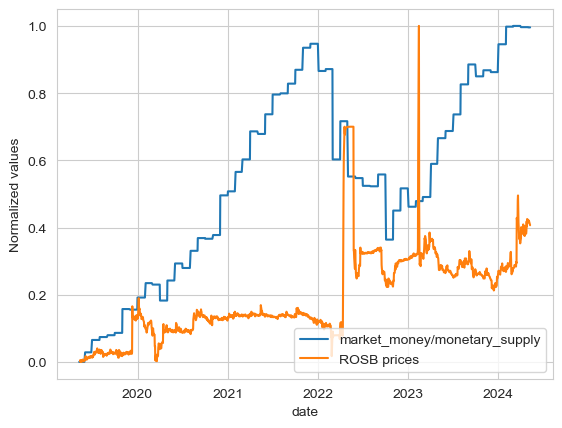

In [119]:
ts_1 = normalize_ts(fintech['market_money/monetary_supply'])
ts_2 = normalize_ts(fintech['close_ROSB_RU'].shift(1))

sns.lineplot(x = fintech.index, y = ts_1, label = 'market_money/monetary_supply')
sns.lineplot(x = fintech.index, y = ts_2, label = 'ROSB prices')
plt.ylabel('Normalized values')
plt.legend();